{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## Test Your Skills - Time Series Data In Python Using Pandas 

Now that you have learned how to open and manipulate time series data in **Python**, it's time to test your skills. Complete the activities below.
</div>

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

# Define relative path to file with daily discharge data
stream_discharge_path = os.path.join("colorado-flood",
                                     "discharge",
                                     "06730200-discharge-daily-1986-2013.csv")

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Explore Your Data & Metadata

Before you begin working with files using **python**, it can be helpful 
to look at the structure of the file itself. In some cases, text files 
have metadata at the top of the file that tell you more about the data within 
the file itself. This information at the top of the text file can help 
you make decisions about how you plan to import the data, and what cleanup 
steps you may need to take.

Open the files `earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv` and `earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt` by clicking on them and review their contents. Use these files to answer the questions below:

1. What is the delimiter used in `06730200-discharge-daily-1986-2013.csv`?
2. What are the units for stream discharge in the data?
3. Where was this data collected?
4. What is the frequency of the data collection (day, week, month)?
5. What does each number represent in the data (a single observation, minimum value, max value or mean value)?

Write down your answers in the cell below as a comment.

****
HINT: You may also want to explore the `README_dischargeMetadata.rtf` file located in the same directory. This file contains metadata that describes in more detail the data that you are using

</div>

In [4]:
# Answers:

# 1. Commas
# 2. Cubic Feet per Second
# 3. BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO.
# 4. Daily
# 5. Mean value

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Open and Plot a CSV File with Time Series Data

The code above creates a path (`stream_discharge_path`) to open daily stream 
discharge measurements taken by U.S. Geological Survey from 1986 to 2013 at 
Boulder Creek in Boulder, Colorado. Using **pandas**, do the following with the data:

1. Read the data into **Python** as a **pandas** `DataFrame`. 
2. Parse the dates in the `datetime` column of the **pandas** `DataFrame`.
3. Set the `datetime` as the index for your `DataFrame`.
4. Plot the newly opened data with **matplotlib**. Make sure your x-axis is the dates, and your y-axis is the `disValue` column from the **pandas** `DataFrame`.
5. Give your plot a title and label the axes.

If you need a refresher on how to plot time series data, check out [this lesson on working with time series data in Pandas.](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/)

Once you have created your plot, answer the following questions.

1. What is the max value for stream charge in the data? One what date did that value occur?
2. Consider the entire dataset. Do you see any patterns of stream discharge values in the data?
</div>

Your final plot should look like the plot below. 

In [5]:
# Import data using pandas
discharge_df = pd.read_csv(stream_discharge_path,
                           parse_dates=['datetime'],
                           index_col=['datetime'])

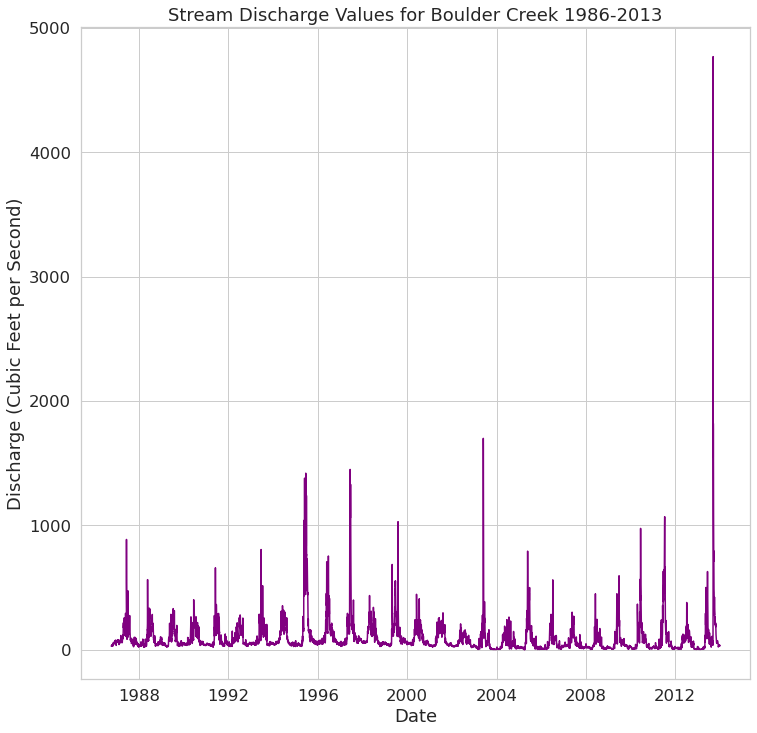

In [6]:
# Build plot from pandas DataFrame

fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(discharge_df.index.values,
        discharge_df['disValue'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Stream Discharge Values for Boulder Creek 1986-2013")

plt.show()

In [7]:
# Answers for text questions

maximum = max(discharge_df['disValue'])
# 4770.0

date = discharge_df.loc[discharge_df['disValue'] == 4770.0].index.values[0]
# 2013-09-12

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3: Subset the Data

The 2013 Colorado Flood occurred in 2013 (as the name implies). The plot above shows all of the stream discharge data over several decades. In this challenge you will subset the data to just the year and months during which the flood event occurred. 

Do the following: 
1. Subset the data to include only discharge data from August 1st, 2013 through October 31, 2013
2. Plot the newly subset data with **matplotlib**. Make sure your x-axis contains dates,  and your y-axis is contains the `disValue` column from your **pandas** `DataFrame`.
3. Give your plot a title and label the axes.
4. Format the dates on the x-axis so they only show the month and the day. Additionally, you can angle the dates using the line of code `fig.autofmt_xdate()`. 
5. Make the x-axis week ticks only show up for every other week. 

The lessons below should help you complete this challenge:

* [More on subsetting time series data using **Pandas**](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/) 
* [More on customizing date labels on time series plots in **matplotlib**](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/). 

</div>

****

In [8]:
discharge_2013 = discharge_df['2013-08-01':'2013-10-31']
date_form = DateFormatter("%b-%d")

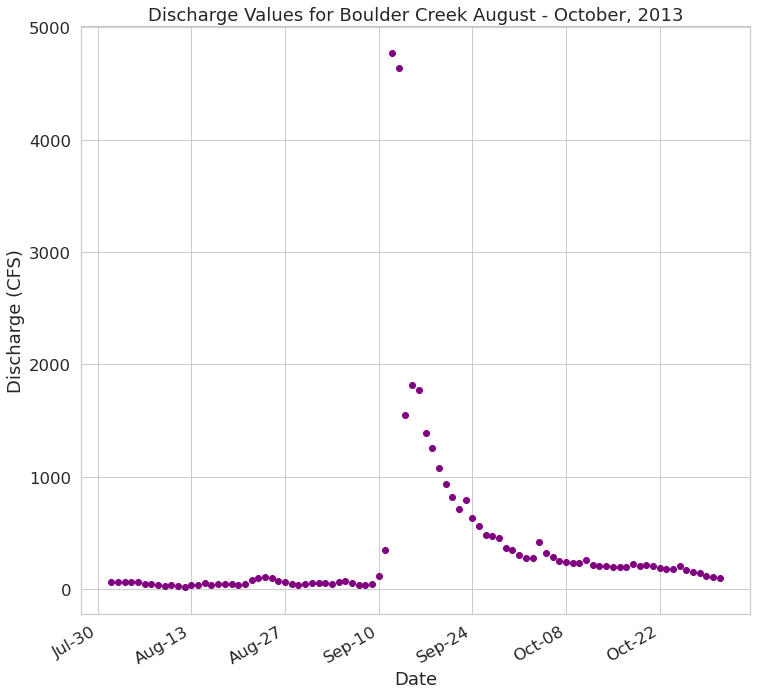

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.scatter(discharge_2013.index.values,
           discharge_2013['disValue'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="Discharge Values for Boulder Creek August - October, 2013")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

ax.xaxis.set_major_formatter(date_form)

fig.autofmt_xdate()

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4: Resample the Data

Next, summarize the stream discharge data by week. Additionally, you will 
clean up the format of the date labels on the x-axis. Do the following: 

1. Resample the `DataFrame` that you made above for August - October, 2013 to represent the maximum stream discharge value for each week. 
2. Plot the newly resampled data as a scatterplot (`ax.scatter()`)using `matplotlib`. Give your plot a title and label the x and y axes.
3. Format the dates on the x-axis so they only show the month and the day. Additionally, you can angle the dates using the line of code `fig.autofmt_xdate()`. 
4. Adjust the x-axis ticks and labels so you have one label and tick for **every other week**. 

****
HINT: The lessons below might help you complete this challenge:

* [Check out the Pandas time series data resampling lesson to help you resample your data.](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/)
* [Check out the customize time series plots lesson to help with adjusting the x axis ticks.](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/)
</div>

*****

In [10]:
# Resample by weekly maximum values
weekly_discharge_2013 = discharge_2013.resample('w').max()

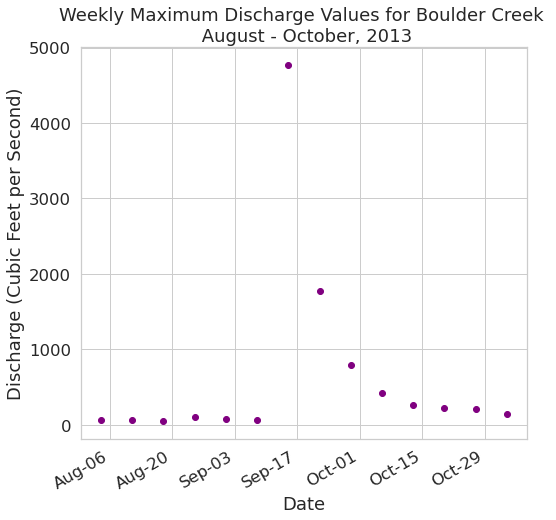

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.scatter(weekly_discharge_2013.index.values,
           weekly_discharge_2013['disValue'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Weekly Maximum Discharge Values for Boulder Creek \n August - October, 2013")


ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(date_form)

fig.autofmt_xdate()

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 5: Compare Two Months Side by Side

In this next challenge, you will compare daily max stream discharge for two time periods. Create a plot comparing stream discharge in  levels to the levels seen 10 years ago during the same months. Do the following: 

1. Create a data subset for the time periods:
    * August 1st, 2003 - October 31st, 2003 
    * August 1st, 2013 - October 31st, 2013 
2. Plot the data from 2003 on a plot above of the data from 2013 using `matplotlib`. 
3. Add titles to each plot and and label the x and y axes.
4. Use `fig.suptitle("title-here")` to add a title to your figure.
5. Modify the y limits of both plots to range from 0 to the max value found in the 2013 data subset. 
    * Hint: you can use `round(data-frame-name["disValue"].max(), -3)` to get the max value from your 2013 data. 
    * use `ax.set_ylim(min-value, max-value)` to set the limits
6. Format the dates on the x-axis as follows:
    * Make sure date ticks only show the month and the day - example: `Aug-06`.
    * Make the x-axis week ticks only display for every other week. 
7. Use `plt.tight_layout()` to ensure your plots don't overlap each other. 

OPTIONAL: You may have noticed empty space on either side of the x-axis in your previous plot. Use `ax.set_xlim()` to set the x limits of your plot to the minimum and maximum date values in each of your subset datasets. 
</div>


****

In [12]:
discharge_2003 = discharge_df['2003-08-01':'2003-10-31']

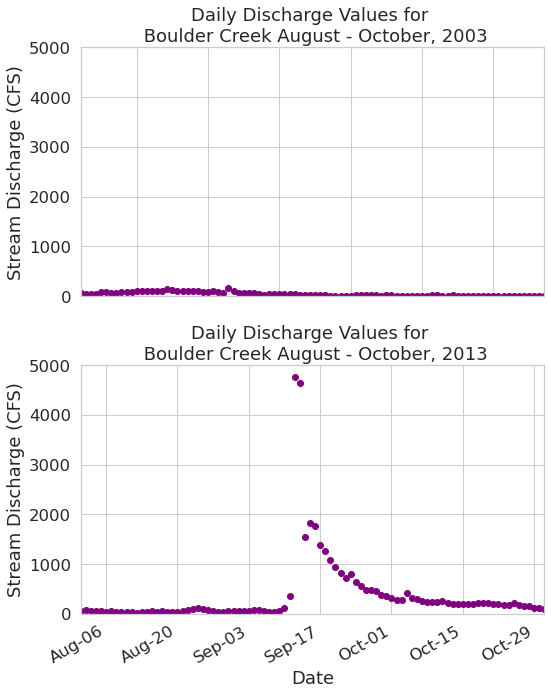

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Add x-axis and y-axis
ax1.scatter(discharge_2003.index.values,
            discharge_2003['disValue'],
            color='purple')

# Set title and labels for axes
ax1.set(xlabel="Date",
        ylabel="Stream Discharge (CFS)",
        title="Daily Discharge Values for \n Boulder Creek August - October, 2003")

# Add x-axis and y-axis
ax2.scatter(discharge_2013.index.values,
            discharge_2013['disValue'],
            color='purple')

# Set title and labels for axes
ax2.set(xlabel="Date",
        ylabel="Stream Discharge (CFS)",
        title="Daily Discharge Values for \n Boulder Creek August - October, 2013")

ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

max_val = round(discharge_2013['disValue'].max(), -3)
ax1.set_ylim(0, max_val)
ax2.set_ylim(0, max_val)

ax1.set_xlim(('2003-08-01'), ('2003-10-31'))
ax2.set_xlim(('2013-08-01'), ('2013-10-31'))


ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

fig.autofmt_xdate()

plt.tight_layout()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Bonus Challenge 1: Get Data from Hydrofunctions

There are many ways to get data into **python**. So far you have used 
`et.data.get_data()` to download your data. However you can also access 
data directly using open source tools that access API's (automated tools 
that directly access and downoad data from the data servers). 

**hydrofunctions** is an open source Python package that allows you to 
download hydrologic data from the U.S. Geological Survey. For the bonus 
challenge, you'll use **hydrofunctions** to download stream discharge data 
and plot it much like you did above. To get the data using **hydrofunctions**, 
run the code below.

```
import hydrofunctions as hf

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

longmont_discharge = hf.extract_nwis_df(longmont_resp)

```

Once you have imported the  data into a **pandas** `DataFrame` using the code 
above, perform the following tasks: 

1. Rename the columns (USGS:06730500:00060:00003, USGS:06730500:00060:00003_qualifiers)) `discharge` and `flags`. This will make the data a bit easier to work with. 
2. Subset the data to the time period: `1970` through the present.
3. Resample the data to calculate the annual maximum stream discharge value for each year. 
4. Plot the data using `matplotlib`. Format the x and y axis so the labels are easy to read. Add a title to your plot.

****
HINT: if you don't know how to rename a dataframe column, try looking it up 
using a Google search!
</div>


****

In [14]:
import hydrofunctions as hf

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

longmont_discharge = hf.extract_nwis_df(longmont_resp)

longmont_discharge.columns = ["discharge", "flag"]

subset = longmont_discharge['1970':]

annual_resample = subset.resample('A').max()

/home/nathan/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


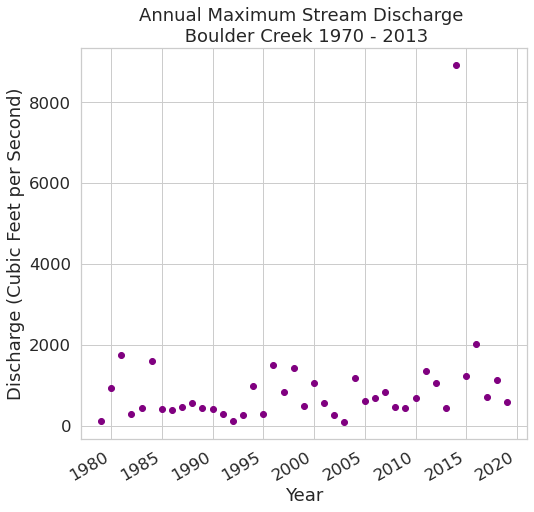

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.scatter(annual_resample.index.values,
           annual_resample['discharge'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Annual Maximum Stream Discharge \n Boulder Creek 1970 - 2013")


fig.autofmt_xdate()

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Bonus Challenge 2: Plot Precipitation and Stream Discharge In One Figure 

For this challenge, you will open up the precipitation dataset also 
found in the `colorado-flood` download, and plot it side by side with 
discharge to see how they interact. For this challenge, you need to:

### Precipitation Data Processing

1. Open the precipitation data that you used previously (`colorado-flood/precipitation/805325-precip-daily-2003-2013.csv`) using **Pandas**.
  * Make sure the date column ("DATE") is set as the index.
  * Set the `na_values` to `999.99`. 
2. Subset the precipitation data to the time period 2013. 
3. Resample the precipitation data to provide a weekly `sum()` of all values instead of hourly. 

### Stream Discharge Data Processing

1. Subset the stream discharge data to the time period 2013.
2. Resample the discharge data provide a the weekly maximum values instead of daily. 

*******
### Plot Your Data In One Figure

* Plot the precipitation data and the discharge data as **scatter plots** stacked one on top of each other so you can compare the two visually. 
*  Format your plots  with titles, x and y axis labels. Make sure the dates are easy to read.
</div>

*****

In [16]:
# Define relative path to file with daily precipitation data
precipitation_path = os.path.join("colorado-flood",
                                  "precipitation",
                                  "805325-precip-daily-2003-2013.csv")

precipitation_df = pd.read_csv(precipitation_path,
                               parse_dates=['DATE'],
                               index_col=['DATE'],
                               na_values=999.99)

precipitation_2013_weekly = precipitation_df['2013'].resample('W').sum()

discharge_2013_weekly = discharge_df['2013'].resample('W').max()

date_form_2 = DateFormatter("%b")

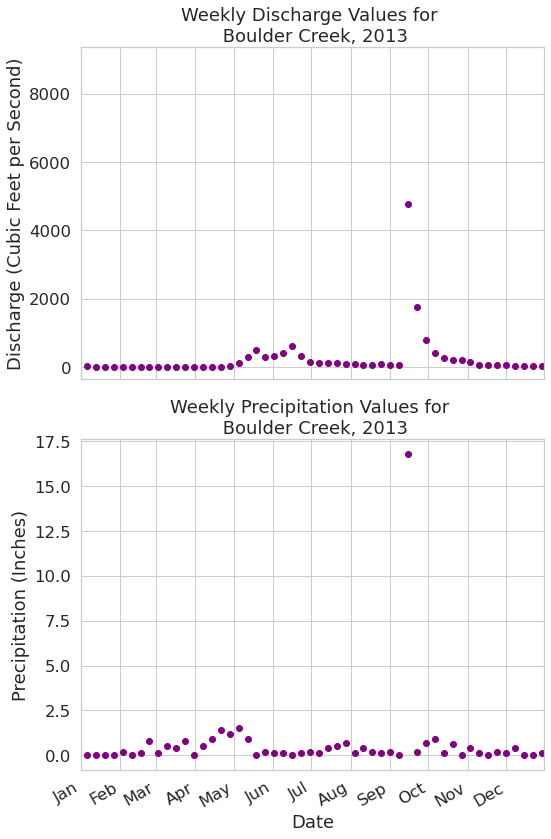

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Add x-axis and y-axis
ax1.scatter(discharge_2013_weekly.index.values,
            discharge_2013_weekly['disValue'],
            color='purple')

# Set title and labels for axes
ax1.set(xlabel="Date",
        ylabel="Discharge (Cubic Feet per Second)",
        title="Weekly Discharge Values for \n Boulder Creek, 2013")

# Add x-axis and y-axis
ax2.scatter(precipitation_2013_weekly.index.values,
            precipitation_2013_weekly['HPCP'],
            color='purple')

# Set title and labels for axes
ax2.set(xlabel="Date",
        ylabel="Precipitation (Inches)",
        title="Weekly Precipitation Values for \n Boulder Creek, 2013")


custom_ylim = (ax.get_ylim())

ax1.xaxis.set_major_formatter(date_form_2)
ax2.xaxis.set_major_formatter(date_form_2)

ax1.set_ylim(custom_ylim)
ax1.set_xlim(('2013-01-01'), ('2013-12-31'))
ax2.set_xlim(('2013-01-01'), ('2013-12-31'))

fig.autofmt_xdate()

plt.tight_layout()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Bonus Challenge 2b: Explore the Data 

Look at the two plots above. Do you notice any patterns between the max precipitation
values and the max stream discharge values?

</div>


In [18]:
# Answer to the above Bonus Challenge

# The patterns coincide, since the abnormally high precipitation was a large factor in creating the flood.